In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train) # apply on whole x data 
x_test=scaler.transform(x_test)

In [5]:
from sklearn.svm import SVC
classifier = SVC(kernel ='rbf', random_state=0) # non linear kernel  
classifier.fit(x_train, y_train)

SVC(random_state=0)

In [6]:
classifier.predict(scaler.transform([[30,87000]]))

array([0], dtype=int64)

In [7]:
y_pred = classifier.predict(x_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]]


In [8]:
from sklearn.metrics import confusion_matrix , accuracy_score
matrix = confusion_matrix(y_test,y_pred)
print (matrix)

[[55  3]
 [ 1 21]]


In [9]:
accuracy_score(y_test,y_pred)

0.95

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


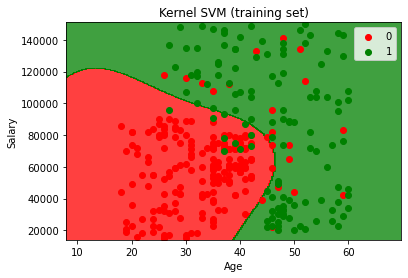

In [10]:
from matplotlib.colors import ListedColormap
x_set,y_set=scaler.inverse_transform(x_train),y_train
x1,x2 = np.meshgrid(np.arange(start =x_set[:,0].min() - 10,stop =x_set[:, 0].max() + 10,step=0.25),
                    np.arange(start =x_set[:,1].min() - 1000,stop =x_set[:, 1].max() + 1000,step=0.25)) 
plt.contourf(x1,x2,classifier.predict(scaler.transform(np.array([x1.ravel(),x2.ravel()]).T)).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label =j)
plt.title('Kernel SVM (training set)')    
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


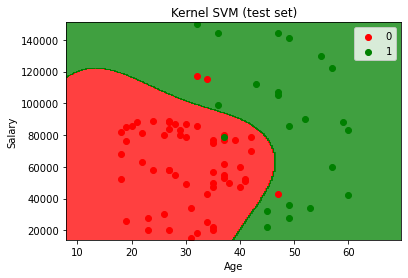

In [11]:
from matplotlib.colors import ListedColormap
x_set,y_set=scaler.inverse_transform(x_test),y_test
x1,x2 = np.meshgrid(np.arange(start =x_set[:,0].min() - 10,stop =x_set[:, 0].max() + 10,step=0.25),
                    np.arange(start =x_set[:,1].min() - 1000,stop =x_set[:, 1].max() + 1000,step=0.25)) 
plt.contourf(x1,x2,classifier.predict(scaler.transform(np.array([x1.ravel(),x2.ravel()]).T)).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label =j)
plt.title('Kernel SVM (test set)')    
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()